In [1]:
import json
import re
from pymongo import MongoClient

In [2]:
client = MongoClient('mongodb://localhost:27017/')
db = client['sd_business']  # This is separate from a collection. A database contains multiple collections.?

In [ ]:
with open('../data/ca_business.json', 'r') as f:
    data = json.load(f)

sd_businesses = []
for line in tqdm(data):
    if type(line) == dict:
        lat, lng = line['latitude'], line['longitude']
        if lat < 33.363442 and lat > 32.534317 and lng > -117.547484 and lng < -115.974969:
            if '_id' in line:
                del line['_id']
            sd_businesses.append(line)

with open('../data/sd_business.json', 'w') as f:
    json.dump(sd_businesses, f)

In [100]:
with open('../data/sd_business.json', 'r') as file:
    data = json.load(file)
    business_collection = db['business']
    business_collection.insert_many(data)

In [101]:
# Find businesses with cafe or restaurant in the category
food_pattern = re.compile(r"(?i)\b(?:cafe|restaurant)\b")
food_filter = {"category": food_pattern}

# Define the update operation
update_food = {"$set": {"food": True}}

# Update documents matching the filter condition
result = collection.update_many(food_filter, update_food)

# Print the number of documents updated
print("Food businesses labeled updated:", result.modified_count)

# Define the filter condition for the remaining businesses
remaining_filter = {"food": {"$exists": False}}

# Define the update operation to set the remaining businesses as not closed
update_remaining = {"$set": {"food": False}}

# Update documents matching the filter condition
result = collection.update_many(remaining_filter, update_remaining)

# Print the number of documents updated
print("Non Food businesses labeled updated:", result.modified_count)

Food businesses labeled updated: 8550
Non Food businesses labeled updated: 37842


In [102]:
# Find businesses with cafe or restaurant in the category
closed_pattern = re.compile(r"(?i)\b(?:permanently closed)\b")
closed_filer = {"state": closed_pattern}

# Define the update operation
update_closed = {"$set": {"closed": True}}

result_closed = collection.update_many(closed_filer, update_closed)
print("Businesses marked as closed:", result_closed.modified_count)

# Define the filter condition for the remaining businesses
remaining_filter = {"closed": {"$exists": False}}

# Define the update operation to set the remaining businesses as not closed
update_remaining = {"$set": {"closed": False}}

# Update the remaining businesses to set closed as false
result_remaining = collection.update_many(remaining_filter, update_remaining)
print("Remaining businesses marked as not closed:", result_remaining.modified_count)

Businesses marked as closed: 3251
Remaining businesses marked as not closed: 43141


In [103]:
# Find businesses with grocery in the category
grocery_pattern = re.compile(r"(?i)\b(?:grocery|food store)\b")
grocery_filter = {"category": grocery_pattern}

# Define the update operation
update_grocery = {"$set": {"grocery": True}}

# Update documents matching the filter condition
result = collection.update_many(grocery_filter, update_grocery)

# Print the number of documents updated
print("Grocery/Convenience updated:", result.modified_count)

remaining_filter = {"grocery": {"$exists": False}}

update_remaining = {"$set": {"grocery": False}}

res = collection.update_many(remaining_filter, update_remaining)

# Print the number of documents updated
print("Non Grocery/Convenience updated:", res.modified_count)

Grocery/Convenience updated: 887
Non Grocery/Convenience updated: 45505


In [104]:
# Find businesses with grocery in the category
school_pattern = re.compile(
    r"(?i)^(?:after school|charter school|education|elementary school|middle school|private university|primary school|preschool|university)$"
)
school_filter = {"category": school_pattern}

# Define the update operation
update_school = {"$set": {"school": True}}

# Update documents matching the filter condition
result = collection.update_many(school_filter, update_school)

# Print the number of documents updated
print("Schools updated:", result.modified_count)

remaining_filter = {"school": {"$exists": False}}

update_remaining = {"$set": {"school": False}}

res = collection.update_many(remaining_filter, update_remaining)

# Print the number of documents updated
print("Non School updated:", res.modified_count)

Schools updated: 192
Non School updated: 46200


In [105]:
all_res = collection.find()
new_json = []
for res in all_res:
    del res['_id']
    active = not res["closed"]
    food = res["food"]
    grocery = res["grocery"]
    school = res['school']
    if active:
        new_json.append(res)

with open('active_business.json', 'w') as f:
    json.dump(new_json, f)

In [127]:
housing_collection.drop()

In [128]:
housing_collection = db['apartment']

In [129]:
with open('../data/housing/processed/craigslist.json', 'r') as f:
    data = json.load(f)
    housing_collection.insert_many(data)

In [130]:
with open('../data/housing/processed/zillow.json', 'r') as f:
    data = json.load(f)
    housing_collection.insert_many(data)

In [131]:
with open('../data/housing/processed/garden.json', 'r') as f:
    data = json.load(f)
    housing_collection.insert_many(data)

In [132]:
with open('../data/housing/processed/apartment.json', 'r') as f:
    data = json.load(f)
    housing_collection.insert_many(data)

In [133]:
# Perform the aggregation pipeline
pipeline = [
    {"$group": {"_id": None, "keys": {"$addToSet": {"$objectToArray": "$$ROOT"}}}},
    {"$project": {"_id": 0, "keys": 1}},
    {"$unwind": "$keys"},
    {"$unwind": "$keys"},
    {"$group": {"_id": "$keys.k", "count": {"$sum": 1}}},
    {"$project": {"_id": 0, "key": "$_id", "count": 1}},
]

result = list(housing_collection.aggregate(pipeline))

# Print the unique keys and their counts
for item in result:
    print(f"Key: {item['key']}, Count: {item['count']}")

Key: beds, Count: 3973
Key: description, Count: 1195
Key: baths, Count: 3973
Key: _id, Count: 3973
Key: Amenities, Count: 560
Key: floorplan, Count: 560
Key: air conditioning, Count: 2621
Key: address, Count: 1352
Key: smoking, Count: 2621
Key: parking, Count: 2621
Key: lon, Count: 2778
Key: phone, Count: 635
Key: EV charging, Count: 2621
Key: Parking, Count: 560
Key: street, Count: 157
Key: appliances, Count: 635
Key: post_id, Count: 2621
Key: rentPeriod, Count: 2621
Key: wheelchair accessible, Count: 2621
Key: amenities, Count: 635
Key: state, Count: 157
Key: Images, Count: 560
Key: laundry, Count: 2621
Key: lat, Count: 2778
Key: Contact, Count: 560
Key: sqft, Count: 3816
Key: price_range, Count: 560
Key: pets, Count: 2621
Key: name, Count: 1195
Key: furnished, Count: 2621
Key: city, Count: 157
Key: Pet Policy, Count: 560
Key: One Time Fees, Count: 560
Key: zipcode, Count: 157
Key: Education, Count: 560
Key: floor_plan, Count: 635
Key: Transportation, Count: 560
Key: houseType, Count

In [30]:
with open('../data/bus_stops.json', 'r') as f:
    data = json.load(f)
    bus_collection = db['bus_stops']
    bus_collection.insert_many(data)

In [106]:
bus_ct = bus_collection.count_documents({})
print(f"Total number of bus stops: {bus_ct}")

Total number of bus stops: 6244


In [107]:
business_ct = business_collection.count_documents({})
print(f"Total number of businesses: {business_ct}")


Total number of businesses: 46392


In [134]:
house_ct = housing_collection.count_documents({})
print(f"Total number of house listings: {house_ct}")


Total number of house listings: 3973


In [135]:
housings = list(housing_collection.find())
for h in housings:
    del h['_id']

# Specify the output file path
output_file = '../data/housing/housing.json'

# Export documents to JSON file
with open(output_file, 'w') as file:
    json.dump(housings, file)

In [85]:
# Perform the aggregation pipeline
pipeline = [
    {"$group": {"_id": None, "prices": {"$push": "$price"}}},
    {"$project": {"_id": 0, "prices": 1}},
    {"$unwind": "$prices"},
    {"$group": {"_id": "$prices", "count": {"$sum": 1}}},
    {"$sort": {"_id": 1}}
]

result = list(housing_collection.aggregate(pipeline))

prices = [item['_id'] for item in result if item['_id'] is not None]
prices = [
    int(re.match(r"\$(\d[\d,]*)", price).group(1).replace(',', '')) 
    if isinstance(price, str) else int(price) for price in prices
]

In [75]:
prices = np.array(result)
mean = np.mean(prices)
median = np.median(prices)
std = np.std(prices)
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
iqr = third_quartile - first_quartile
low_threshold = first_quartile - 1.5 * iqr
high_threshold = third_quartile + 1.5 * iqr

In [78]:
trimmed_prices = prices[(prices > low_threshold) & (prices < high_threshold)]

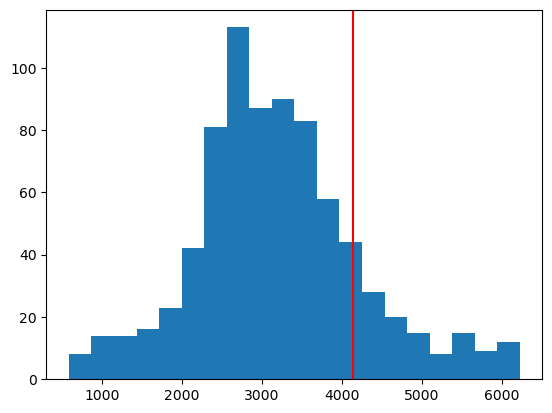

In [82]:
plt.hist(trimmed_prices, bins=20)
plt.axvline(trimmed_prices[np.random.randint(0, len(trimmed_prices))], color='red', label='Mean')

In [84]:
plt.savefig('../figs/price_distribution.png')

<Figure size 640x480 with 0 Axes>